# Plot AT2017gfo runs

Abstract: This is to plot and compare different runs on the AT2017gfo dataset.

First of all, this is to check if we can reproduce the run that is in Peter's directory.

After that, we can use the same script to plot other runs:
- Bu2023 test run
- flax Bu2022 run

Note: Peter's run is at: `/home/enlil/ppang/Projects/AT2017gfo_chemical_tf/inference/inference/Bu2022Ye_uniform_iota/outdir/`

Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import json
import corner 

params = {"axes.grid": True,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(params)

# Improved corner kwargs
default_corner_kwargs = dict(bins=40, 
                        smooth=1., 
                        show_titles=False,
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        color="blue",
                        # quantiles=[],
                        # levels=[0.9],
                        plot_density=True, 
                        plot_datapoints=False, 
                        fill_contours=True,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        save=False)

# parameter_names = ['inclination_EM', 'log10_mej_dyn', 'vej_dyn', 'Yedyn', 'log10_mej_wind', 'vej_wind', 'timeshift', 'luminosity_distance', 'Ebv']
parameter_names = ['log10_mej_dyn', 'vej_dyn', 'log10_mej_wind', 'vej_wind', 'Yedyn', 'inclination_EM']
labels = ['$\\log_{10}M^{\\rm{dyn}}_{\\rm{ej}}$', '$V^{\\rm{dyn}}_{\\rm{ej}}$', '$\\log_{10}M^{\\rm{wind}}_{\\rm{ej}}$', '$V^{\\rm{wind}}_{\\rm{ej}}$', '$Y_{\\rm{e}}$', '$\\iota$']
colors = ["blue", "orange", "red", "green", "purple", "yellow", "cyan", "magenta"]

## Utilities

In [2]:
def get_posterior_from_filename(results_filename,
                                return_likelihood = False):
    with open(results_filename, "r") as f:
        results = json.load(f)
    posterior = results["posterior"]["content"]

    if return_likelihood:
        log_likelihood = posterior['log_likelihood']    

        return posterior, log_likelihood
    else:
        return posterior
    
    
def get_samples(posterior):
    posterior_dict = {}
    for param in parameter_names:
        posterior_dict[param] = posterior[param]
    posterior_samples = np.array([posterior_dict[param] for param in parameter_names]).T
    
    return posterior_samples

Locations of runs:

- "/home/urash/twouters/KN-inference-GPU/Bu2022_test_run/runs/outdir/AT2017gfo_original_result.json": reproduces Peter's run
- "/home/urash/twouters/KN-inference-GPU/Bu2022_test_run/runs/outdir/AT2017gfo_corrected_result.json": same as above, but use the data corrected for extinction

## Compare runs

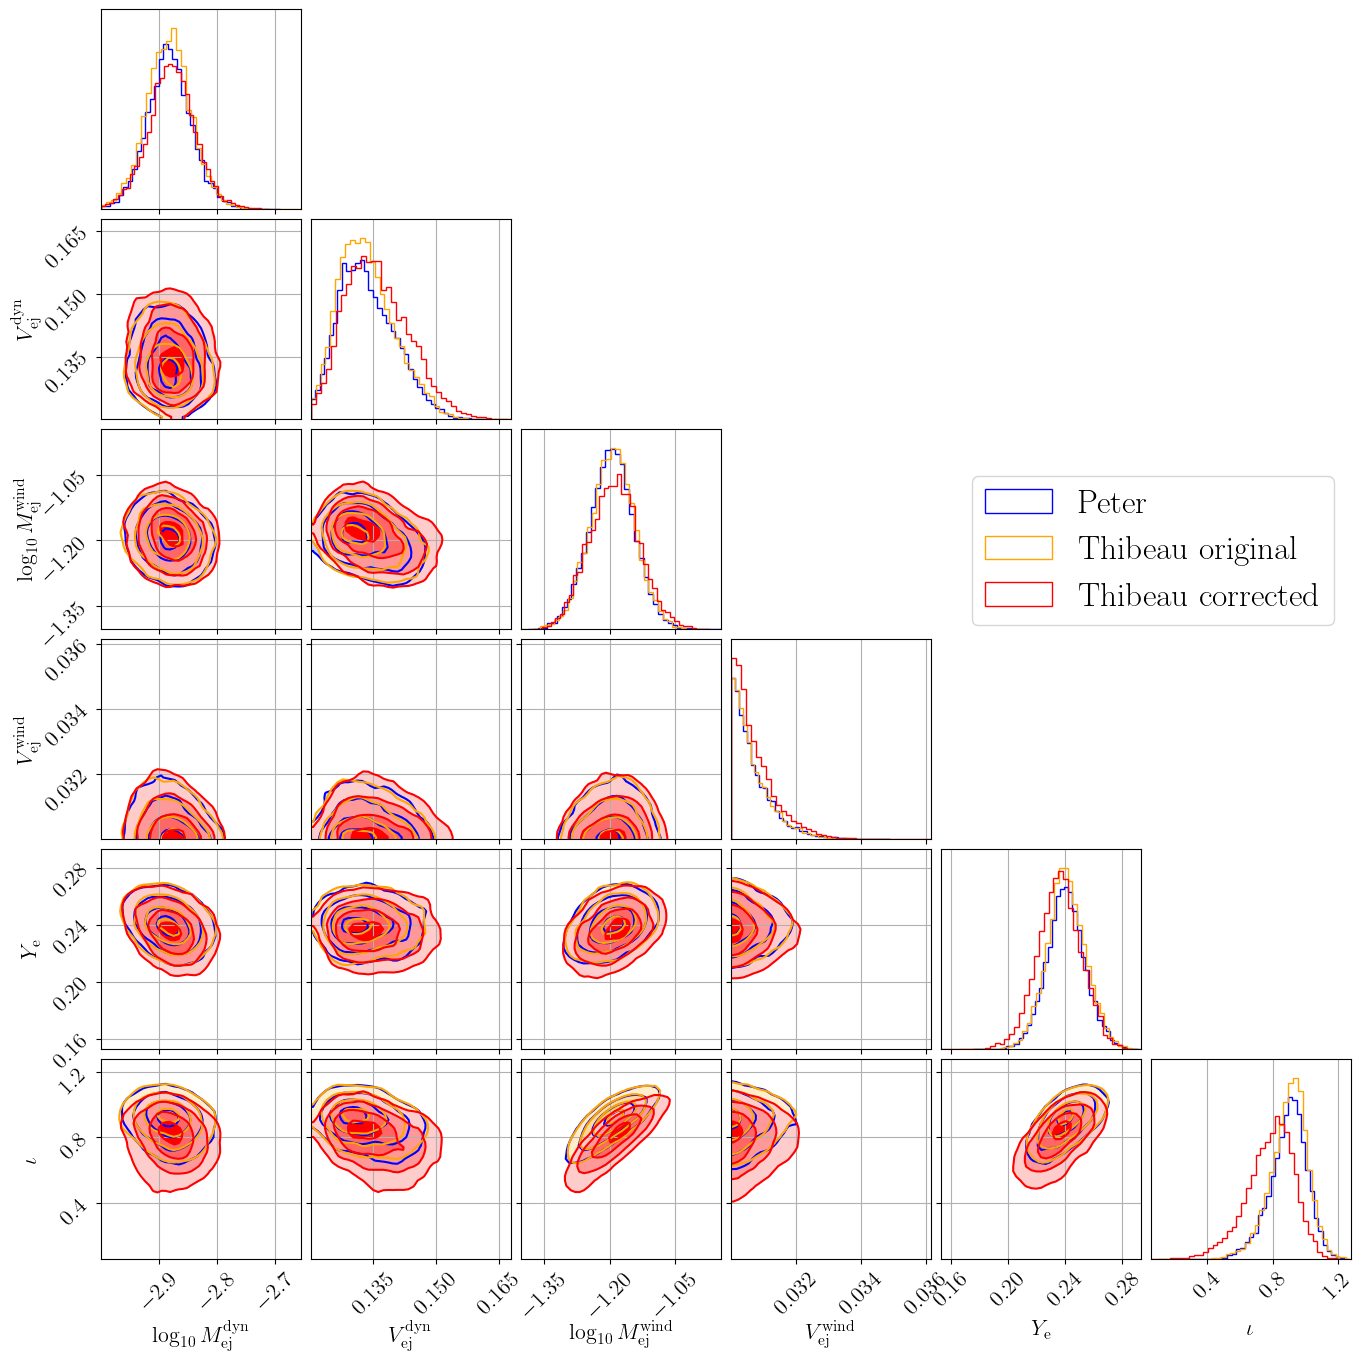

In [3]:
filenames_dict = {
    "Peter": "/home/enlil/ppang/Projects/AT2017gfo_chemical_tf/inference/inference/Bu2022Ye_uniform_iota/outdir/AT2017gfo_Bu2022Ye_uniform_iota_result.json",
    }
plot_labels = filenames_dict.keys()

# Load data
posterior_samples_dict = {}
posterior_dict = {}

for name, filepath in filenames_dict.items():
    posterior = get_posterior_from_filename(filepath)
    posterior_dict[name] = posterior
    posterior_samples_dict[name] = get_samples(posterior)
    
# Plot data
for i, name in enumerate(posterior_samples_dict.keys()):
    posterior_samples = posterior_samples_dict[name]
    default_corner_kwargs["color"] = colors[i]
    if i == 0:
        fig = corner.corner(posterior_samples, labels=labels, **default_corner_kwargs)
    else:
        corner.corner(posterior_samples, fig=fig, labels=labels, **default_corner_kwargs)

# Make a legend
plt.legend(plot_labels, fontsize=24, bbox_to_anchor=(1, 4))
plt.show()